## IMPORT THE NECCESSARY LIBRARIES


In [1]:
#Importing the neccessary libraries for the dataset
#These include Pandas,numpy, seaborn,matplotlib,norm,stats etc

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier



## READ DATASET

In [3]:
#Reading the data into the Data Frame.

In [4]:
data_frame = pd.read_csv('C:/Users/HP/Desktop/AirBnBPricing/airbnb-price_predict-main/datasets/AB_NYC_2019.csv')

## 1.DATA DISCOVERY


In [5]:
# This refers to familiarising yourself with data such that you can conceptualise it

In [6]:
# 1.1 Data Preparation

In [7]:

#The data preparation phase rearranges the data so that the visualization and analysis portion of 
#data discovery can run more smoothly.


In [8]:
#Checking to see how the dataset looks like
#Display the first five rows of the dataset
#This confirms the type of data frame in use

In [9]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
#Display twenty rows of the dataset randomly

In [11]:
data_frame.sample(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8981,6896715,Charming 1br apartment in midtown,10489933,Michelle,Manhattan,Midtown,40.76003,-73.96969,Entire home/apt,180,30,0,NaN,NaN,1,177
22756,18423707,One bedroom in Kips Bay / Murray Hill area,15786933,Eddie,Manhattan,Midtown,40.74559,-73.98216,Entire home/apt,259,7,0,NaN,NaN,1,0
40355,31292656,Brand New and Modern Room in Brooklyn,22552061,Nikol,Brooklyn,Bushwick,40.69420,-73.92598,Private room,80,1,1,2019-02-17,0.21,1,168
30176,23285903,Your stylish home in Park Slope,10713617,Liberty,Brooklyn,South Slope,40.66459,-73.98553,Entire home/apt,260,2,6,2019-06-30,0.40,1,1
19774,15832702,Modern Light Filled 1 Bedroom in East Williams...,11727149,Silvana,Brooklyn,Williamsburg,40.70687,-73.94250,Entire home/apt,150,3,19,2018-03-26,0.59,1,0
34771,27569308,Fire Escape + Roof Views 30-min from Manhattan,16303550,Arianna,Brooklyn,Bushwick,40.68643,-73.91552,Private room,39,31,1,2018-09-29,0.11,1,35
4338,2909461,Spacious One Bedroom in UWS,14864202,Raymond,Manhattan,Upper West Side,40.78352,-73.97482,Entire home/apt,200,1,9,2015-07-28,0.14,1,0
10353,7920170,Sunny room in a contemporary modern apartment,36089884,Adrian,Manhattan,Washington Heights,40.85597,-73.93330,Private room,50,2,93,2019-06-05,3.37,1,208
15023,11980791,Clean/Elegant HK Apt. w/ Cute Bear,10461612,Devon,Manhattan,Hell's Kitchen,40.76257,-73.98603,Entire home/apt,160,3,20,2017-05-29,0.50,1,0
29460,22602979,Great Private & Cozy bedroom in Crown Heights,166286543,Mark,Brooklyn,Crown Heights,40.67299,-73.95521,Private room,49,7,6,2019-06-12,0.41,2,299


In [12]:
#Display the last five rows of the dataset

In [13]:
data_frame.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [14]:
# Checking for infor,atoin about the dataset

In [15]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. SANITY DATA CHECK

In [16]:
#Checking for number of missig or null values 

In [17]:
data_frame.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [18]:
data_frame.isnull().sum()/len(data_frame)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [19]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [20]:
# Dislpaying the columns in the dataframe

In [21]:
data_frame.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
# Describing the Dataframe

In [23]:
data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
data_frame[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [25]:
# Dropping the Unnecessary variables

In [26]:
df1 = data_frame[['id',
    #'name', 
    'host_id', 
    #'host_name',
    'neighbourhood_group',
       'neighbourhood', 
        #'latitude', 'longitude', 
    'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 
                  'calculated_host_listings_count',
       'availability_365']].copy()

In [27]:
df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [28]:
# Determining the shape of the dataset

In [29]:
df1.shape

(48895, 12)

In [30]:
df1.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [31]:
df1.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:
# Renaming the columns

In [33]:
df1 = df1.rename(columns = {'id':'List_Id', 'host_id':'Host_Id', 'neighbourhood':'Neighbourhood', 
        'neighbourhood_group': 'Neighbourhood_Group',
        'room_type':'Room_Type', 'price':'Price_Dollars',
       'minimum_nights':'Minimum_Nights', 'number_of_reviews':'Number_Of_Reviews', 'last_review':'Last_Reviews',
       'reviews_per_month':'Reviews_Per_Month', 'calculated_host_listings_count':'Number_Of_Host_Listings',
       'availability_365':'Availability'})

In [34]:
df1.head()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
47574,35807411,2367604,Queens,Ridgewood,Private room,50,1,0,NaN,NaN,1,67
45382,34711823,71668793,Brooklyn,Crown Heights,Entire home/apt,149,3,7,2019-07-04,4.20,1,299
16616,13298512,6444963,Brooklyn,Bedford-Stuyvesant,Private room,50,6,3,2019-02-11,0.08,1,3
47638,35842224,110026,Brooklyn,Bedford-Stuyvesant,Entire home/apt,87,1,0,NaN,NaN,1,9
5394,3897601,18572906,Brooklyn,Park Slope,Private room,55,3,4,2016-09-19,0.07,1,0
3848,2331154,4467316,Brooklyn,Williamsburg,Private room,60,30,16,2019-07-05,0.28,2,190
4710,3312417,3691863,Brooklyn,Bedford-Stuyvesant,Private room,78,3,86,2019-06-30,1.43,1,362
28331,22017804,27105320,Brooklyn,Crown Heights,Private room,35,7,0,NaN,NaN,1,0
5343,3857180,3861404,Brooklyn,Prospect-Lefferts Gardens,Private room,150,5,11,2016-10-31,0.23,2,0
35813,28428636,137358866,Queens,Elmhurst,Private room,38,30,2,2019-05-30,0.39,103,247


In [36]:
df1.tail()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,68119814,Manhattan,Hell's Kitchen,Private room,90,7,0,NaN,NaN,1,23


## Filling the Null value

In [37]:
#Checking for number of missig or null values 

In [38]:
df1.isnull()

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,True,True,False,False


In [39]:
df1.loc[df1.duplicated(subset = ['Neighbourhood'])]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
10,5295,7702,Manhattan,Upper West Side,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,7989,Manhattan,Hell's Kitchen,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,11528,Manhattan,Upper West Side,Private room,85,2,113,2019-07-05,0.91,1,333
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,21207,Brooklyn,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


In [40]:
df1.isnull().sum()/len(df1)*100

List_Id                     0.000000
Host_Id                     0.000000
Neighbourhood_Group         0.000000
Neighbourhood               0.000000
Room_Type                   0.000000
Price_Dollars               0.000000
Minimum_Nights              0.000000
Number_Of_Reviews           0.000000
Last_Reviews               20.558339
Reviews_Per_Month          20.558339
Number_Of_Host_Listings     0.000000
Availability                0.000000
dtype: float64

In [41]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [42]:

# Fill missing values or drop columns with too many missing values



In [43]:
df1['Reviews_Per_Month'].fillna(0, inplace=True)
df1.drop(['Last_Reviews'], axis=1, inplace=True)



In [44]:
# Check for missing values

In [45]:
df1.isnull().sum()

List_Id                    0
Host_Id                    0
Neighbourhood_Group        0
Neighbourhood              0
Room_Type                  0
Price_Dollars              0
Minimum_Nights             0
Number_Of_Reviews          0
Reviews_Per_Month          0
Number_Of_Host_Listings    0
Availability               0
dtype: int64

In [46]:
print("There are {} missing Values in the Data".format(df1.isnull().sum().sum()))

There are 0 missing Values in the Data


In [47]:
# Checking for duplicate values

In [48]:
df1.loc[df1.duplicated()]

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [49]:
df1.duplicated(subset = ['Neighbourhood'])

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

In [50]:
df1.query('Neighbourhood =="East Harlem"')

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
19,7750,17985,Manhattan,East Harlem,Entire home/apt,190,7,0,0.00,2,249
70,16974,65837,Manhattan,East Harlem,Entire home/apt,225,4,190,1.64,1,215
154,36647,157798,Manhattan,East Harlem,Private room,69,2,34,0.32,1,10
208,54860,258164,Manhattan,East Harlem,Private room,100,5,204,1.92,1,192
...,...,...,...,...,...,...,...,...,...,...,...
48818,36447795,274035866,Manhattan,East Harlem,Entire home/apt,110,2,0,0.00,1,25
48874,36477588,214535893,Manhattan,East Harlem,Private room,50,7,0,0.00,1,22
48875,36478343,274273284,Manhattan,East Harlem,Private room,140,1,0,0.00,1,180
48883,36482416,131529729,Manhattan,East Harlem,Private room,75,2,0,0.00,2,364


In [51]:
df1.dtypes

List_Id                      int64
Host_Id                      int64
Neighbourhood_Group         object
Neighbourhood               object
Room_Type                   object
Price_Dollars                int64
Minimum_Nights               int64
Number_Of_Reviews            int64
Reviews_Per_Month          float64
Number_Of_Host_Listings      int64
Availability                 int64
dtype: object

In [52]:
df1 = df1.loc[~df1.duplicated(subset = ['Neighbourhood','Room_Type','Minimum_Nights','Number_Of_Reviews'])]\
.reset_index(drop=True).copy()


In [53]:
# Checking for garbage

In [54]:
for i in df1.select_dtypes(include = "object").columns:
    print(df1[i].value_counts())
    print('***'*10)

Manhattan        9453
Brooklyn         9293
Queens           3803
Bronx             972
Staten Island     356
Name: Neighbourhood_Group, dtype: int64
******************************
Bedford-Stuyvesant    1212
Williamsburg          1119
Harlem                1006
Bushwick               780
Hell's Kitchen         755
                      ... 
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: Neighbourhood, Length: 221, dtype: int64
******************************
Entire home/apt    12331
Private room       10686
Shared room          860
Name: Room_Type, dtype: int64
******************************


In [55]:
#Checking for unique values

In [56]:
df1.nunique()

List_Id                    23877
Host_Id                    19525
Neighbourhood_Group            5
Neighbourhood                221
Room_Type                      3
Price_Dollars                515
Minimum_Nights               109
Number_Of_Reviews            394
Reviews_Per_Month            899
Number_Of_Host_Listings       43
Availability                 366
dtype: int64

In [57]:
df1.shape

(23877, 11)

In [58]:
# Describing the dataset

In [59]:
df1.describe()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
count,2.387700e+04,2.387700e+04,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,1.476919e+07,5.385410e+07,142.285756,7.950706,40.057419,1.440328,2.816099,125.751979
std,1.048182e+07,6.805600e+07,232.306408,27.374581,56.620952,1.775315,12.395368,130.967852
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.951402e+06,5.202854e+06,67.000000,2.000000,4.000000,0.170000,1.000000,0.000000
50%,1.400781e+07,2.246338e+07,100.000000,3.000000,17.000000,0.760000,1.000000,77.000000
75%,2.275209e+07,7.653684e+07,160.000000,5.000000,53.000000,2.210000,2.000000,249.000000
max,3.647575e+07,2.742256e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [60]:
# Histogram to understand the distribution

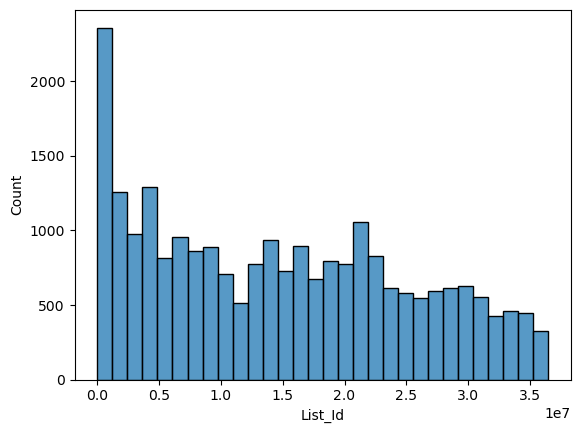

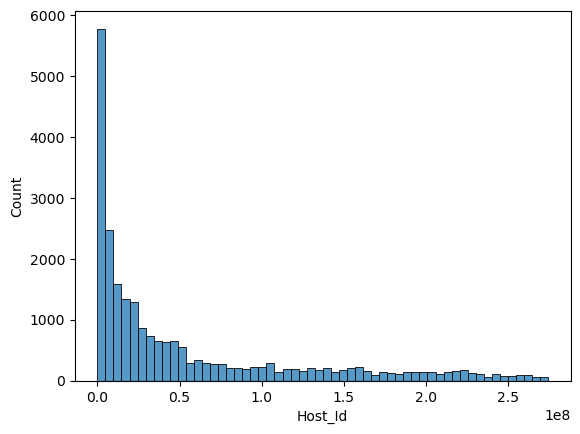

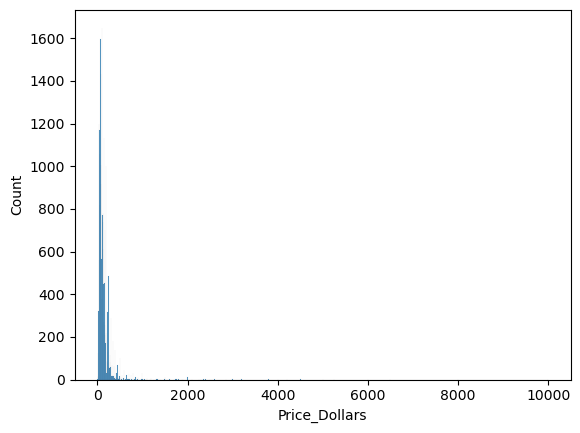

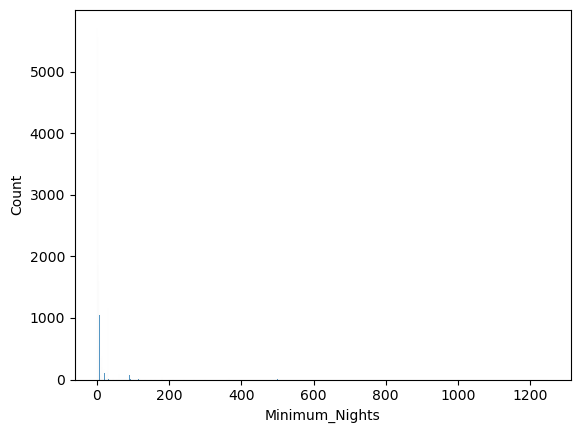

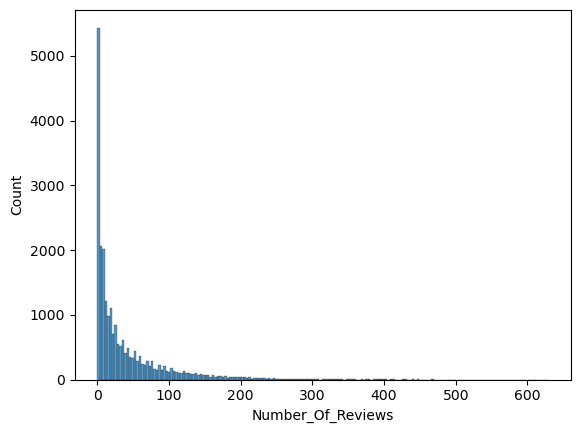

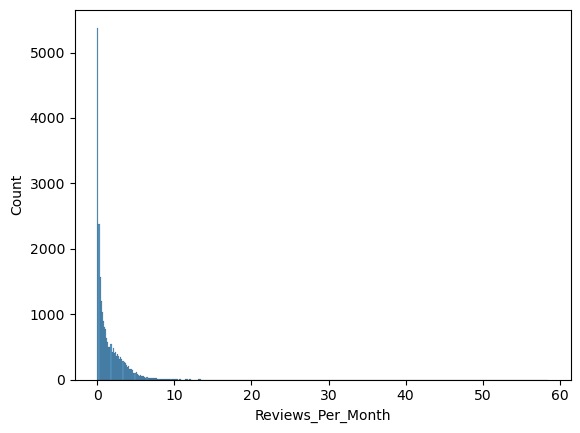

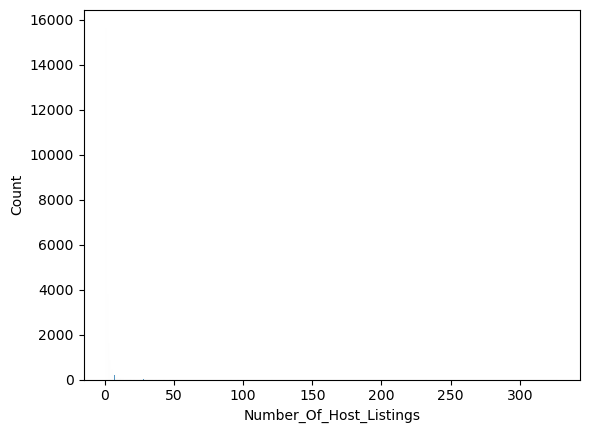

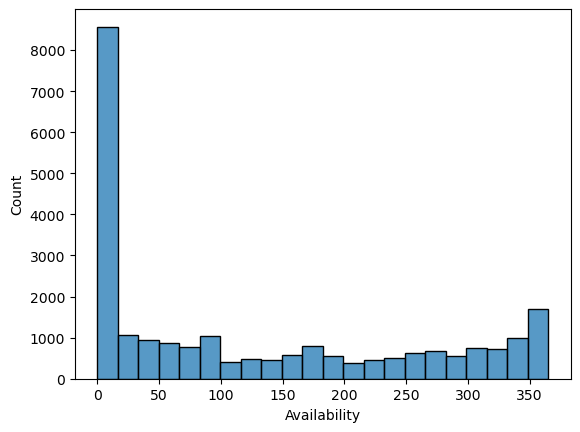

In [61]:
for i in df1.select_dtypes(include="number").columns:
     sns.histplot(data=df1,x=i)
     plt.show()

In [62]:
# BoxPlot to identify outliers

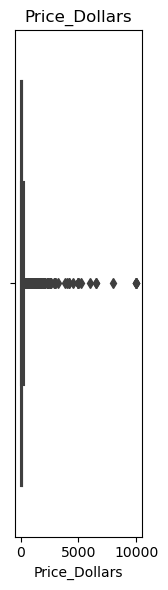

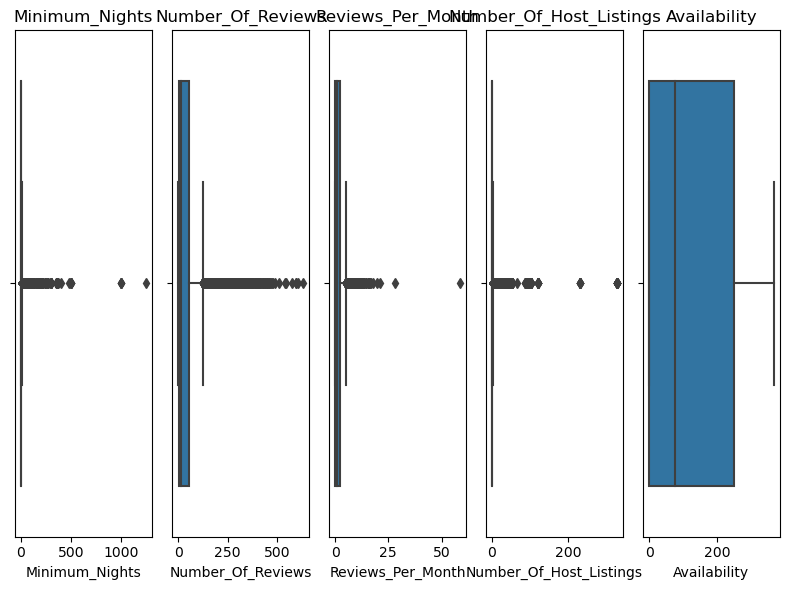

In [63]:
plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


In [64]:
# Outlier treatment

In [65]:
#Detection and removal of outliers using percentile

In [66]:
# Calculating the lower and upper percentile threshold for Price_Dollars

min_threshold,max_threshold=df1.Price_Dollars.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Prices below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Minimum_Nights.quantile([0.010,0.999])
min_threshold,max_threshold
print("Entries with Nights below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Number_Of_Reviews.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Number of reviews below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Reviews_Per_Month.quantile([0.001,0.999])
min_threshold,max_threshold
print("Entries with Monthly reviews below", min_threshold, "or above" ,max_threshold, "are removed")

min_threshold,max_threshold=df1.Number_Of_Host_Listings.quantile([0.010,0.999])
min_threshold,max_threshold
print("Entries with Listings below", min_threshold, "or above" ,max_threshold, "are removed")

Entries with Prices below 16.0 or above 2631.0000000008586 are removed
Entries with Nights below 1.0 or above 365.0 are removed
Entries with Number of reviews below 0.0 or above 430.0 are removed
Entries with Monthly reviews below 0.0 or above 12.858600000000514 are removed
Entries with Listings below 1.0 or above 232.0 are removed


In [67]:
# Determining the rows where Price_Dollars is below the lower threshold
df1[df1.Price_Dollars<min_threshold]
df1[df1.Minimum_Nights<min_threshold]
df1[df1.Number_Of_Reviews<min_threshold]
df1[df1.Reviews_Per_Month<min_threshold]
df1[df1.Number_Of_Host_Listings<min_threshold]    


,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [68]:
#Determining the rows where Price_Dollars is above the upper threshold

df1[df1.Price_Dollars>max_threshold]
df1[df1.Minimum_Nights>max_threshold]
df1[df1.Number_Of_Reviews>max_threshold]
df1[df1.Reviews_Per_Month>max_threshold]
df1[df1.Number_Of_Host_Listings>max_threshold]


,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
21914,30937594,219517861,Manhattan,Murray Hill,Entire home/apt,245,2,4,0.94,327,137
21915,30937595,219517861,Manhattan,Hell's Kitchen,Entire home/apt,185,29,1,1.00,327,281
21916,30937597,219517861,Manhattan,Murray Hill,Entire home/apt,252,2,7,1.19,327,117
21917,30937762,219517861,Manhattan,Murray Hill,Entire home/apt,243,2,6,1.09,327,153
22390,32218803,219517861,Manhattan,Financial District,Private room,200,2,13,2.81,327,352
22393,32223317,219517861,Manhattan,Financial District,Entire home/apt,404,2,10,2.26,327,330
22395,32225187,219517861,Manhattan,Financial District,Private room,375,2,5,1.24,327,280
22396,32225206,219517861,Manhattan,Financial District,Entire home/apt,472,2,12,2.67,327,234
22397,32225207,219517861,Manhattan,Financial District,Private room,256,2,16,3.75,327,329
22400,32236518,219517861,Manhattan,Financial District,Entire home/apt,454,2,11,3.33,327,297


In [69]:
# Filtering the dataset to remove outliers
df1= df1[(df1.Price_Dollars<max_threshold) & (df1.Price_Dollars>min_threshold)]
df1= df1[(df1.Minimum_Nights<max_threshold) & (df1.Minimum_Nights>min_threshold)]
df1= df1[(df1.Number_Of_Reviews<max_threshold) & (df1.Number_Of_Reviews>min_threshold)]
df1= df1[(df1.Reviews_Per_Month<max_threshold) & (df1.Reviews_Per_Month>min_threshold)]
df1= df1[(df1.Number_Of_Host_Listings<max_threshold) & (df1.Number_Of_Host_Listings>min_threshold)]
df1.shape

(2255, 11)

In [70]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
16550,21108401,643120,Brooklyn,Williamsburg,Private room,60,4,36,1.67,4,0
10732,12376365,45601111,Queens,Laurelton,Private room,40,2,47,1.19,5,173
1909,860401,1603942,Brooklyn,Fort Greene,Entire home/apt,149,29,86,1.10,2,125
20523,28187614,212899703,Queens,Jamaica,Entire home/apt,83,3,29,2.82,3,48
13305,16148051,40146897,Brooklyn,Crown Heights,Private room,29,2,97,3.07,5,145
1805,825545,872805,Manhattan,Greenwich Village,Private room,120,21,79,1.04,2,34
12472,14850904,92963740,Brooklyn,Sunset Park,Entire home/apt,140,2,83,2.40,2,7
13570,16401944,107455767,Queens,Rosedale,Private room,50,15,92,2.96,5,356
22656,32865372,3179866,Queens,Jamaica,Entire home/apt,170,3,8,2.79,2,336
6841,6269968,25915648,Queens,Flushing,Private room,37,2,128,2.53,2,20


In [71]:
print(df1.shape)

(2255, 11)


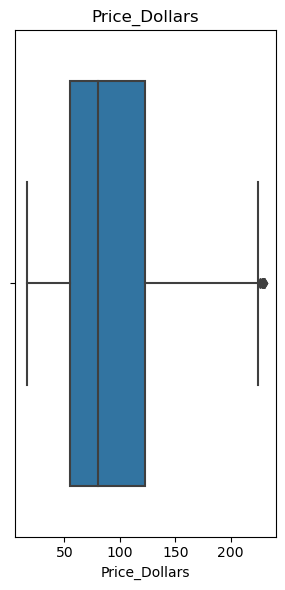

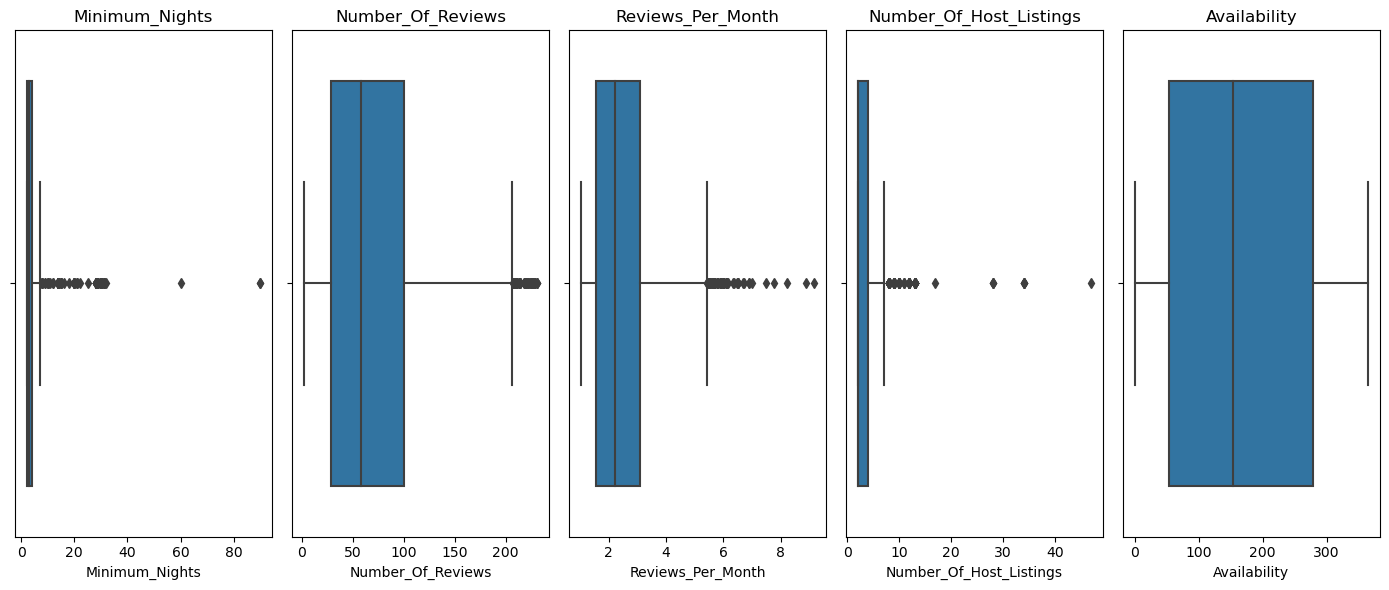

In [72]:



plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Price_Dollars')
plt.title('Price_Dollars')
plt.tight_layout()

plt.figure(figsize=(14,6))
plt.subplot(1,5,1)
sns.boxplot(data=df1,x='Minimum_Nights')
plt.title('Minimum_Nights')
plt.tight_layout()


plt.subplot(1,5,2)
sns.boxplot(data=df1,x='Number_Of_Reviews')
plt.title('Number_Of_Reviews')
plt.tight_layout()


plt.subplot(1,5,3)
sns.boxplot(data=df1,x='Reviews_Per_Month')
plt.title('Reviews_Per_Month')
plt.tight_layout()


plt.subplot(1,5,4)
sns.boxplot(data=df1,x='Number_Of_Host_Listings')
plt.title('Number_Of_Host_Listings')
plt.tight_layout()


plt.subplot(1,5,5)
sns.boxplot(data=df1,x='Availability')
plt.title('Availability')
plt.tight_layout()


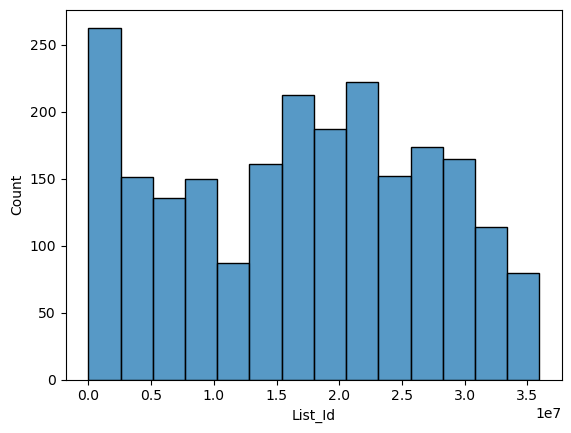

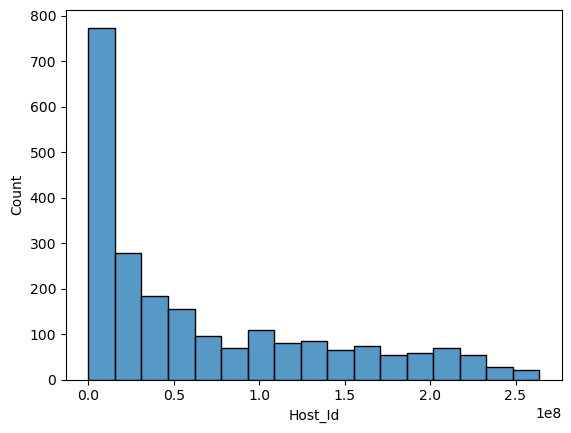

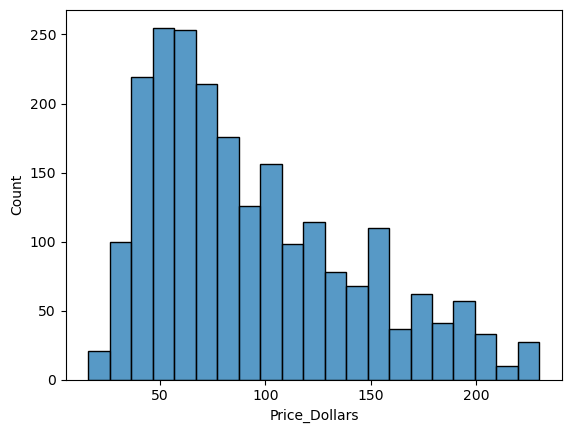

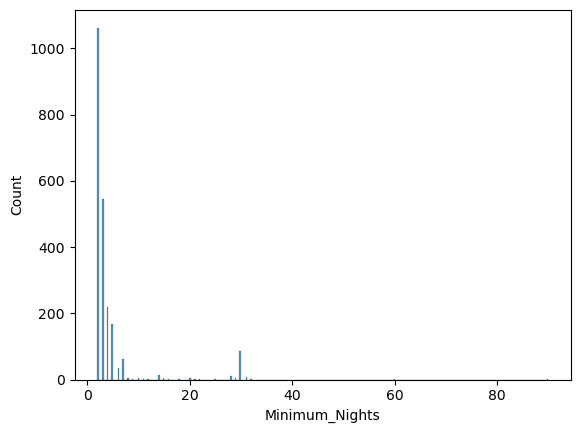

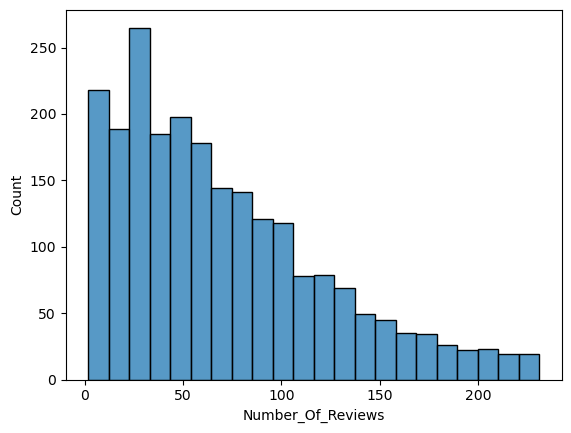

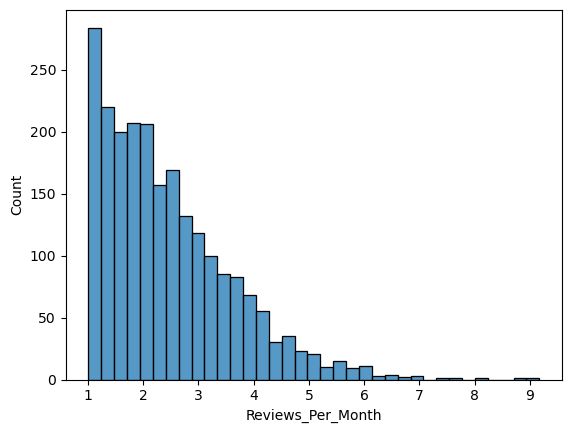

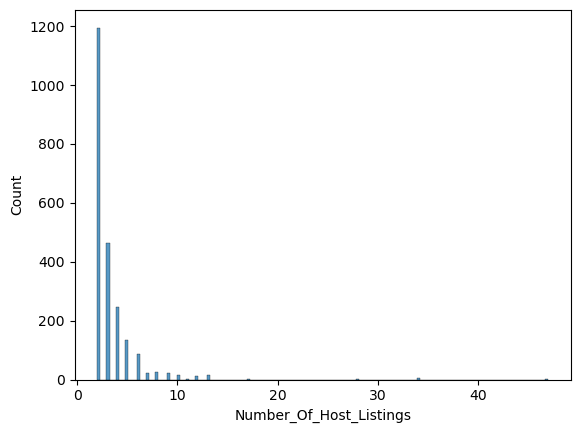

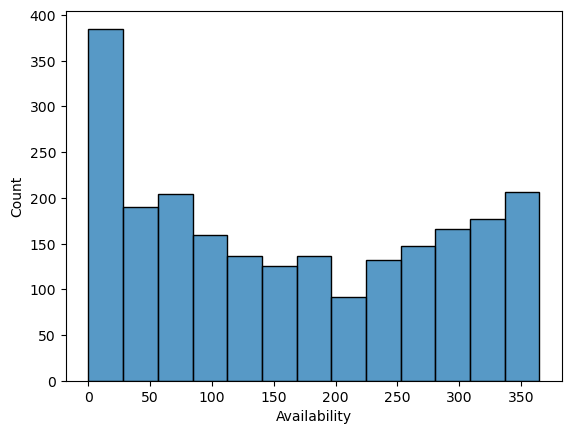

In [73]:
for i in df1.select_dtypes(include="number").columns:
     sns.histplot(data=df1,x=i)
     plt.show()

In [74]:
# Defining the columns of the dataframe

In [75]:
df1.columns


Index(['List_Id', 'Host_Id', 'Neighbourhood_Group', 'Neighbourhood',
       'Room_Type', 'Price_Dollars', 'Minimum_Nights', 'Number_Of_Reviews',
       'Reviews_Per_Month', 'Number_Of_Host_Listings', 'Availability'],
      dtype='object')

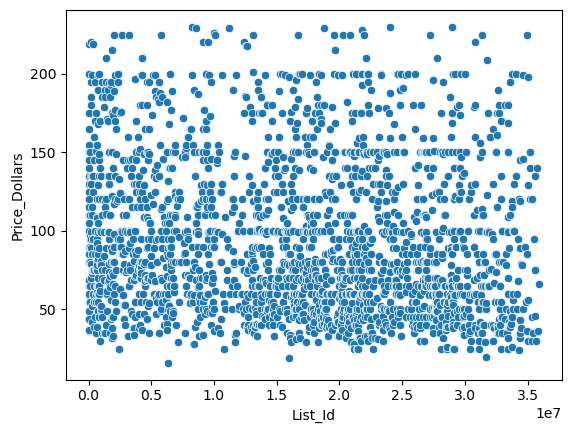

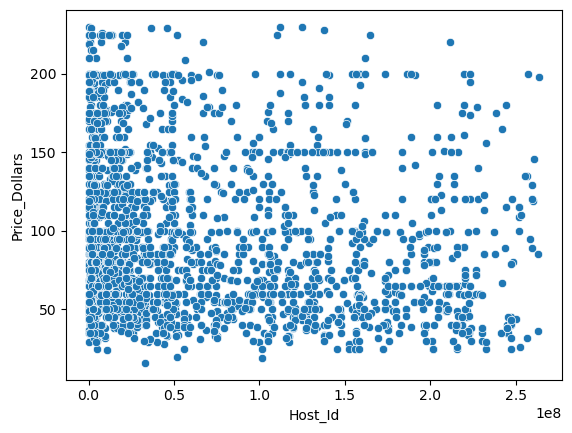

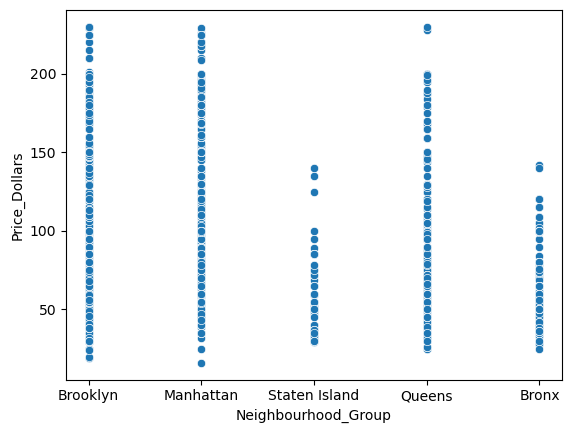

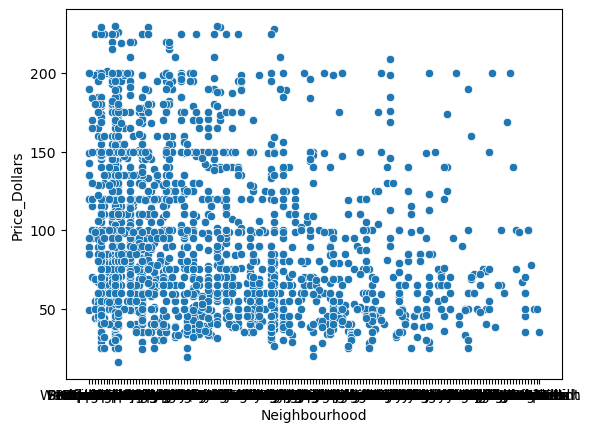

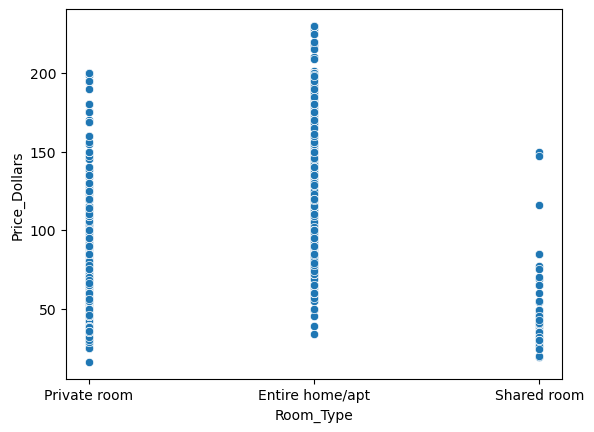

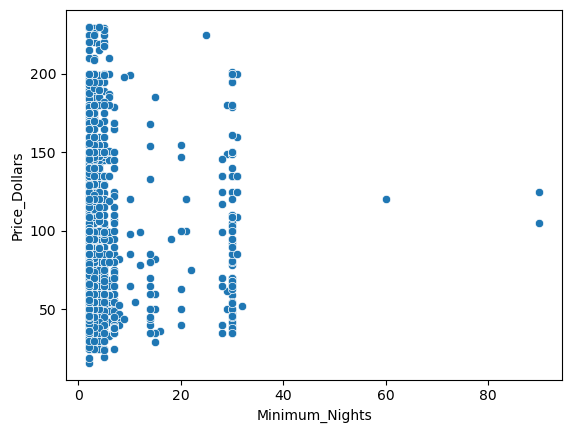

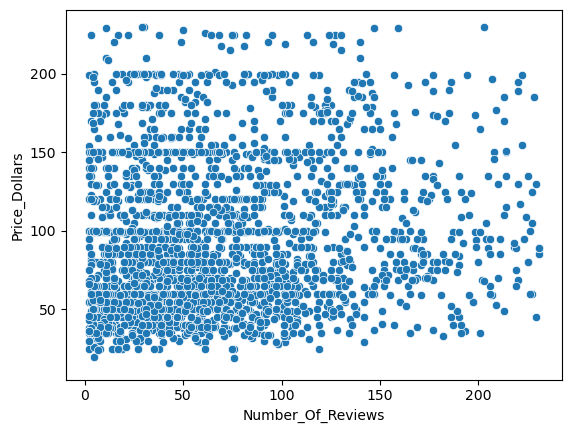

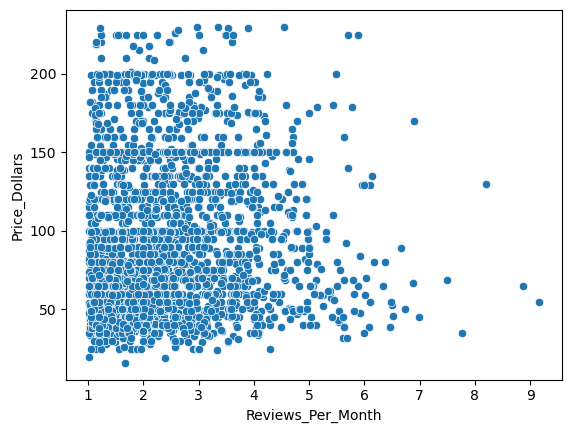

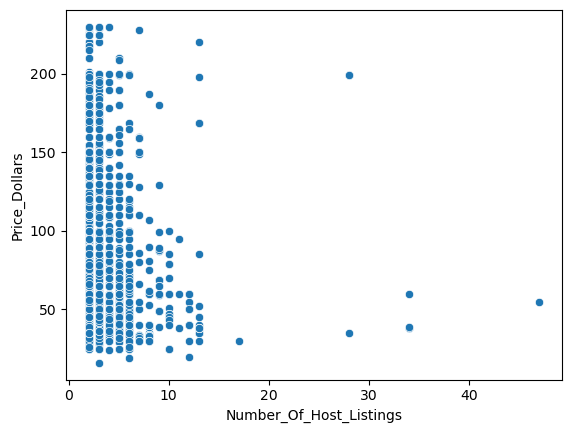

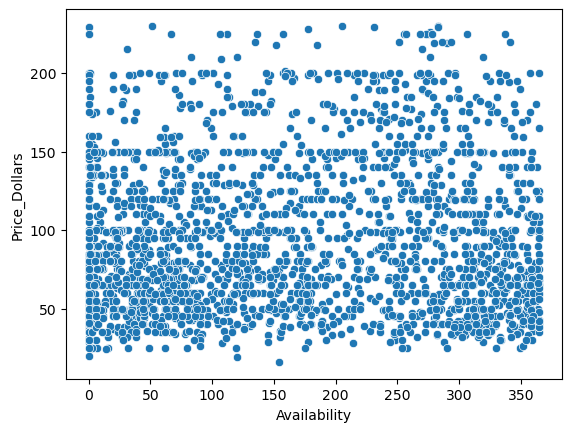

In [76]:
for i in ['List_Id', 'Host_Id','Neighbourhood_Group', 'Neighbourhood', 'Room_Type', 
       'Minimum_Nights', 'Number_Of_Reviews', 'Reviews_Per_Month',
       'Number_Of_Host_Listings', 'Availability']:
     sns.scatterplot(data=df1,x=i,y='Price_Dollars')
     plt.show()

In [77]:
# Pie Chart showing room type distribution percentage

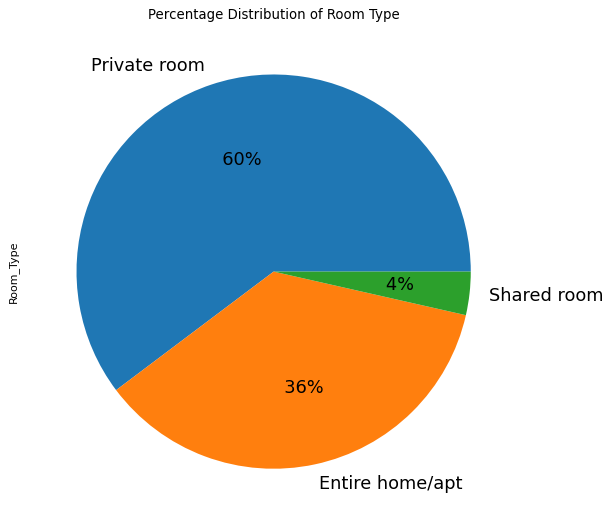

In [78]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Room_Type'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Room Type')
plt.show()

In [79]:
# Pie chart showing the percentage distribution of Neighbourhood_Group

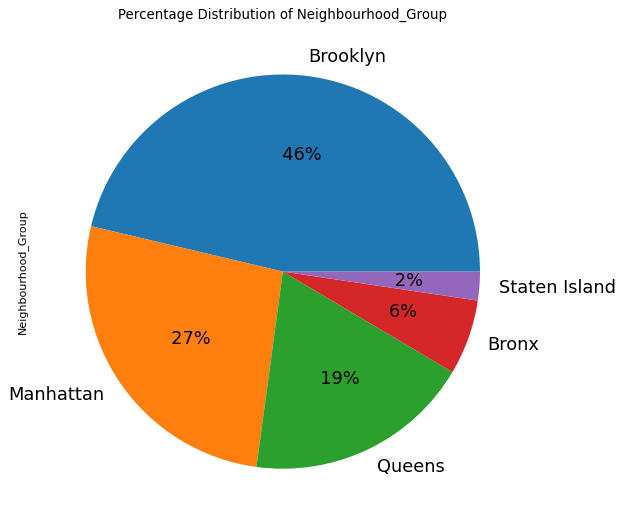

In [80]:
fig = plt.figure(figsize=(8,8), dpi=80)
df1['Neighbourhood_Group'].value_counts().plot(kind='pie',  autopct='%4.0f%%', startangle=360, fontsize=16)
plt.title('Percentage Distribution of Neighbourhood_Group')
plt.show()

<AxesSubplot:xlabel='Neighbourhood_Group', ylabel='Price_Dollars'>

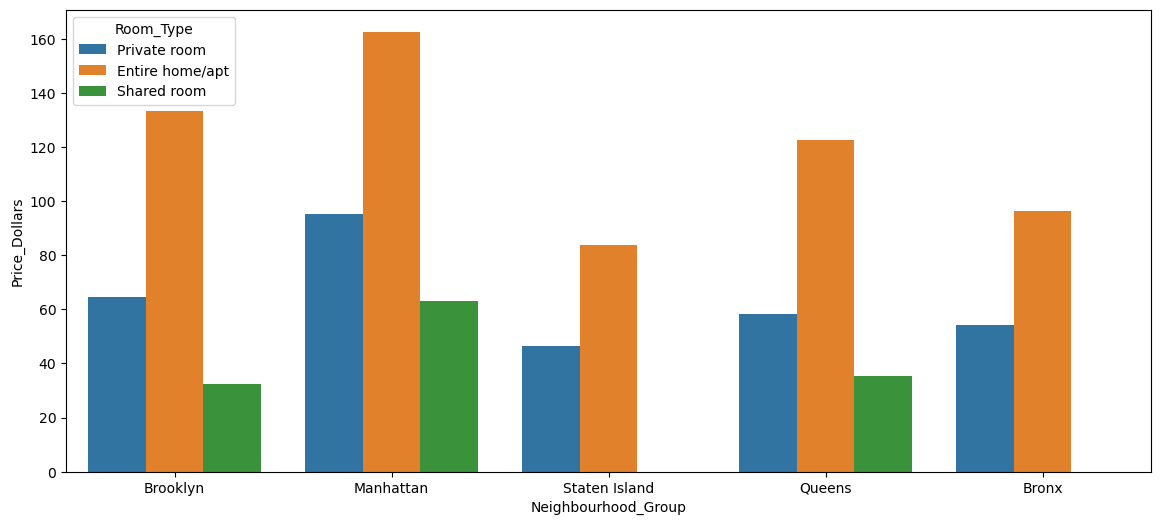

In [81]:
plt.figure(figsize=(14, 6))
sns.barplot(df1.Neighbourhood_Group, df1.Price_Dollars, hue=df1.Room_Type, ci=None)

In [82]:
# Histogram to understand the distribution of prices

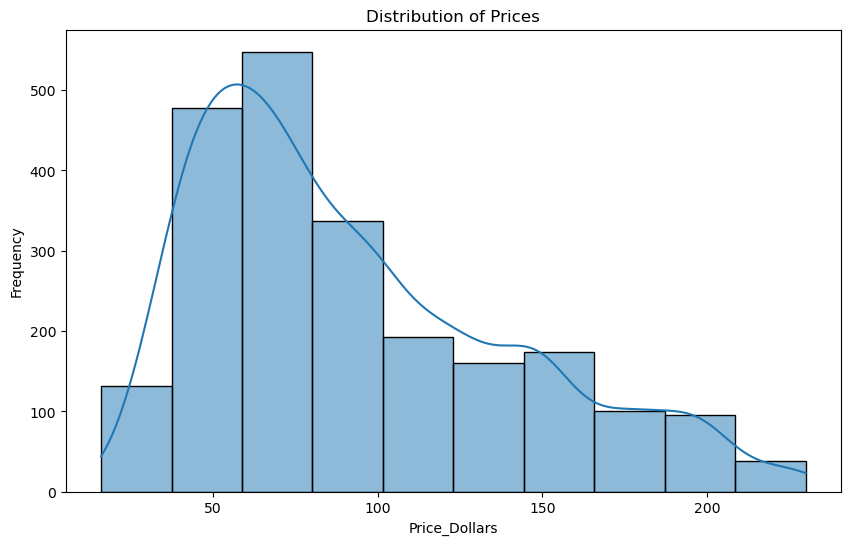

In [83]:

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price_Dollars'], bins=10, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price_Dollars')
plt.ylabel('Frequency')
plt.show()


In [84]:
print(f"Average of price per night : ${df1.Price_Dollars.mean():.2f}")
print(f"Maximum price per night : ${df1.Price_Dollars.max()}")
print(f"Minimum price per night : ${df1.Price_Dollars.min()}")

Average of price per night : $93.30
Maximum price per night : $230
Minimum price per night : $16


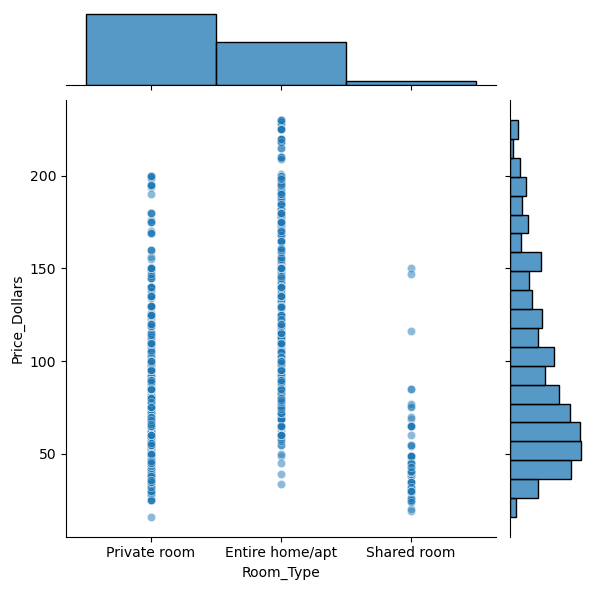

In [85]:
sns.jointplot(x ='Room_Type', y = 'Price_Dollars',data=df1,alpha=0.5)

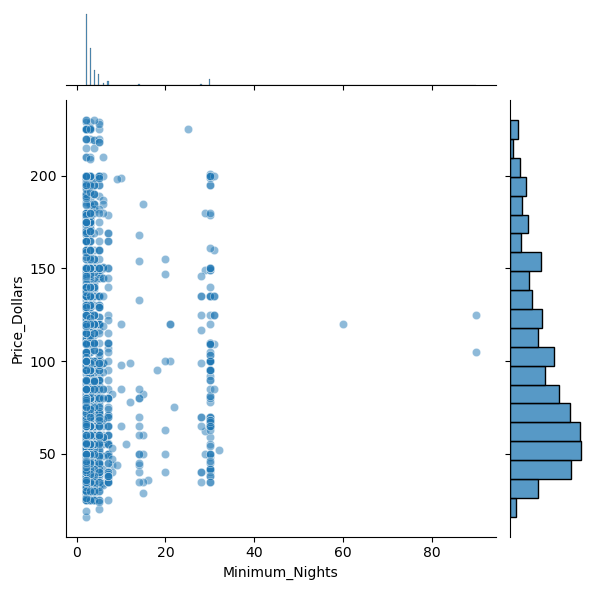

In [86]:
sns.jointplot(x ='Minimum_Nights', y = 'Price_Dollars',data=df1,alpha=0.5)


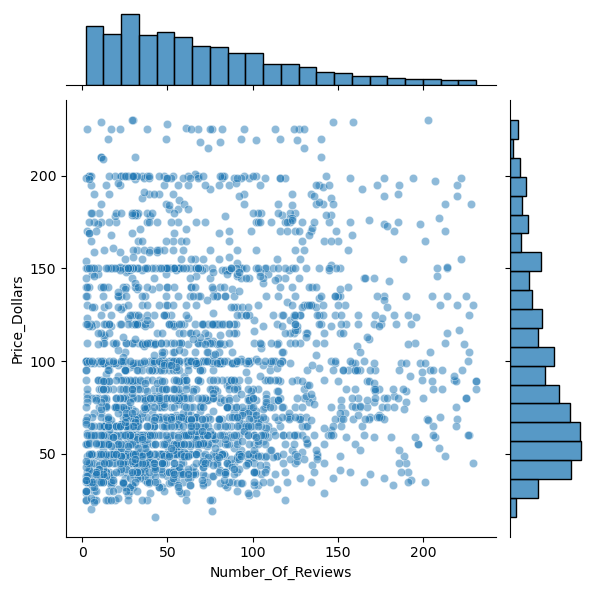

In [87]:
sns.jointplot(x ='Number_Of_Reviews', y = 'Price_Dollars',data=df1,alpha=0.5)

In [88]:
# Ploting a correlation matrix to interpret the relation and multicolinearity

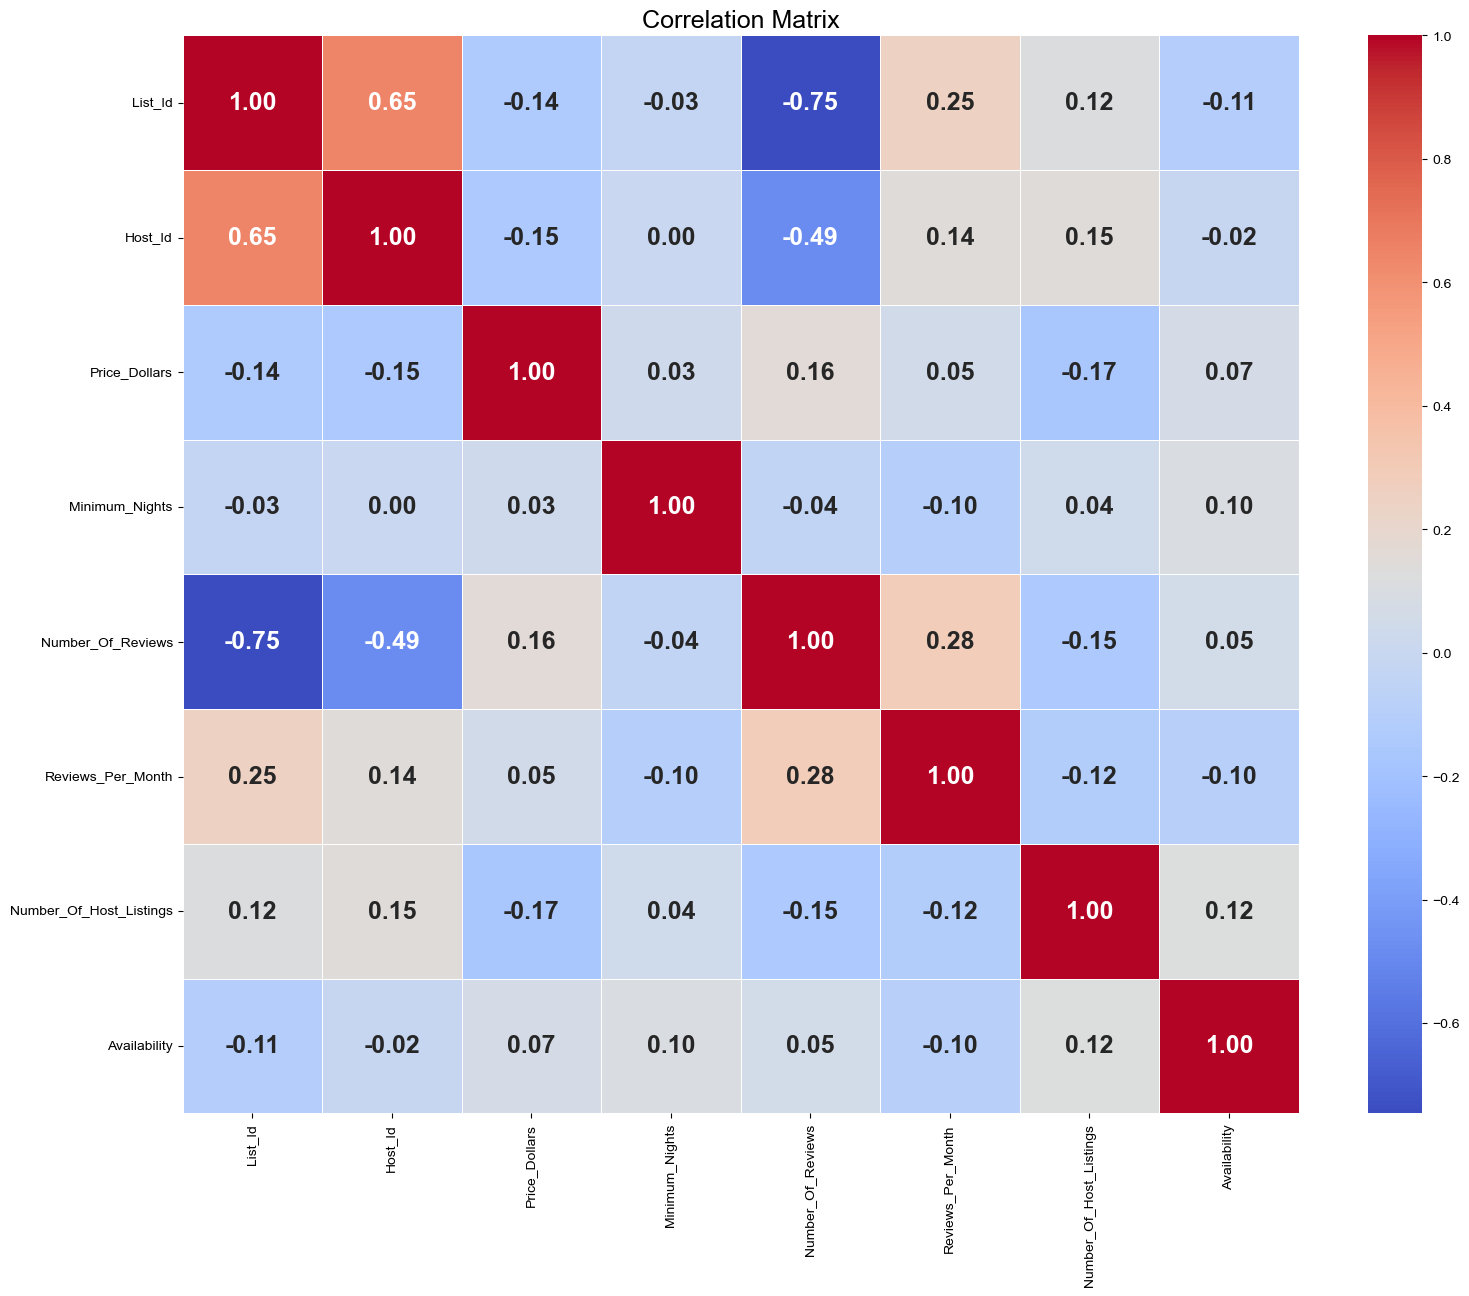

In [89]:
correlation_matrix = df1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm',annot_kws={'fontsize':18, 'fontweight':'bold'})
sns.set(font_scale=1.5)
plt.title('Correlation Matrix')
plt.show()


In [90]:
df1.select_dtypes(include="number").corr()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
List_Id,1.000000,0.646814,-0.136319,-0.027511,-0.746440,0.250680,0.119478,-0.105967
Host_Id,0.646814,1.000000,-0.152719,0.000765,-0.486632,0.144135,0.145563,-0.016078
Price_Dollars,-0.136319,-0.152719,1.000000,0.032288,0.155821,0.049324,-0.172742,0.066760
Minimum_Nights,-0.027511,0.000765,0.032288,1.000000,-0.037648,-0.100642,0.043422,0.103310
Number_Of_Reviews,-0.746440,-0.486632,0.155821,-0.037648,1.000000,0.283988,-0.152206,0.054304
Reviews_Per_Month,0.250680,0.144135,0.049324,-0.100642,0.283988,1.000000,-0.118389,-0.096634
Number_Of_Host_Listings,0.119478,0.145563,-0.172742,0.043422,-0.152206,-0.118389,1.000000,0.123191
Availability,-0.105967,-0.016078,0.066760,0.103310,0.054304,-0.096634,0.123191,1.000000


In [91]:
# Assigning integers to Neighbourhood_Group and Room_Type

In [92]:
oe = OrdinalEncoder()
df1['Neighbourhood_Group'] = oe.fit_transform(df1[['Neighbourhood_Group']])
df1['Room_Type'] = oe.fit_transform(df1[['Room_Type']])

In [93]:
print(df1)

        List_Id    Host_Id  Neighbourhood_Group   Neighbourhood  Room_Type  \
12         5803       9744                  1.0     South Slope        1.0   
21         8024      22486                  1.0      Park Slope        1.0   
28         9518      31374                  2.0          Inwood        1.0   
32         9782      32169                  1.0      Greenpoint        1.0   
35        10962       9744                  1.0     South Slope        1.0   
...         ...        ...                  ...             ...        ...   
23672  35620506   28891151                  1.0   East New York        1.0   
23689  35705257  175730239                  3.0       Sunnyside        2.0   
23700  35744074   73670512                  1.0       Gravesend        0.0   
23707  35800600   73676969                  0.0  Williamsbridge        1.0   
23747  35946932  118405437                  3.0       Woodhaven        1.0   

       Price_Dollars  Minimum_Nights  Number_Of_Reviews  Review

In [94]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood_Group,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
14112,17344027,42024722,2.0,Chelsea,1.0,103,5,77,2.73,2,79
14276,17632840,114736959,1.0,Coney Island,0.0,99,2,68,2.51,6,125
14390,17791464,57643057,3.0,Long Island City,1.0,71,7,102,3.66,2,173
512,187566,279078,1.0,Bedford-Stuyvesant,0.0,99,2,187,1.97,2,287
9506,9828004,15163256,1.0,Sheepshead Bay,1.0,67,3,62,1.65,3,338
20206,27545876,207795404,2.0,Hell's Kitchen,0.0,151,6,22,2.10,2,56
437,152259,256161,2.0,Harlem,1.0,55,3,119,1.22,5,333
6853,6291371,31675601,1.0,Bay Ridge,1.0,65,30,57,1.13,4,307
22837,33421406,10149317,3.0,Kew Gardens,1.0,60,3,11,4.34,5,318
821,294263,417504,1.0,Greenpoint,0.0,199,3,89,1.06,28,62


## FEATURE ENGINEERING

In [95]:
# Select Relevant features that will help with model development

In [96]:
features = ['Minimum_Nights', 'Neighbourhood_Group','Room_Type','Number_Of_Host_Listings', 'Availability']
target = 'Price_Dollars'

df1 = df1.dropna(subset=features + [target])

# LINEAR REGRESSION MODEL

In [97]:
# SPLITTING INTO TRAIN AND TEST

In [98]:
X = df1[features]
y= df1[target]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Normalising the dataset

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [102]:
# MODEL TRAINING

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
# MODEL EVALUATION

In [105]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1330.2889780202308
Root Mean Squared Error: 36.473126792478745
Mean absolute Error: 28.282410972335608
R-squared: 0.38366793148307465


In [106]:
X_test

array([[-0.22634272, -0.68932254,  0.61922176, -0.5110984 , -0.21008165],
       [-0.22634272,  0.39389859,  0.61922176, -0.5110984 , -1.21046259],
       [-0.08802217,  1.47711973,  0.61922176,  0.32406602, -0.92936381],
       ...,
       [-0.36466327,  0.39389859,  0.61922176, -0.5110984 , -1.05337798],
       [-0.22634272, -0.68932254, -1.24257166, -0.5110984 ,  0.45959485],
       [-0.36466327,  0.39389859, -1.24257166,  0.32406602, -0.73094114]])

In [107]:
y_test

21939     70
15312     69
22467     85
8647      98
6701      60
        ... 
20464    120
6268     185
5402      65
1438      75
21001     95
Name: Price_Dollars, Length: 451, dtype: int64

In [108]:
X_train

array([[ 0.21469091, -0.69715877,  0.60177213, -0.4727047 , -0.63554901],
       [ 0.06351901, -0.69715877,  2.45432659,  0.26243261, -1.38116995],
       [-0.38999668,  2.52214437, -1.25078234, -0.4727047 , -0.04910558],
       ...,
       [-0.38999668,  0.37594227, -1.25078234, -0.10513605, -0.14963874],
       [-0.23882478, -0.69715877, -1.25078234, -0.10513605, -1.38116995],
       [-0.38999668,  0.37594227,  0.60177213, -0.10513605, -0.83661533]])

In [109]:
y_train

1564      99
2465      35
15094     85
15909     45
13311    130
        ... 
18573     79
14072     53
14292    199
15682     89
11885     69
Name: Price_Dollars, Length: 1804, dtype: int64

In [110]:
# Implement Dynamic Pricing

In [111]:
df1['Predicted_Price']= lr.predict(df1[features])
df1['Adjusted_Price']=df1['Predicted_Price']*1.1
print("PREDICTED PRICE\n")
print(df1['Predicted_Price'])
print("\n")
print("ADJUSTED PRICE")
print(df1['Adjusted_Price'])

PREDICTED PRICE

12       712.209616
21       775.357758
28       706.419749
32       649.435451
35       766.613893
            ...    
23672    783.731799
23689    746.284699
23700    553.544694
23707    153.602303
23747    819.902871
Name: Predicted_Price, Length: 2255, dtype: float64


ADJUSTED PRICE
12       783.430578
21       852.893534
28       777.061724
32       714.378996
35       843.275282
            ...    
23672    862.104979
23689    820.913169
23700    608.899164
23707    168.962533
23747    901.893158
Name: Adjusted_Price, Length: 2255, dtype: float64


In [ ]:
# MONITOR AND UPDATING THE MODEL

In [ ]:
import time

def monitor_and_update_model(df1, lr, features, target, threshold=0.5, interval=86400):
    while True:
        # Predict prices
        df1['Predicted_Price'] = lr.predict(df1[features])
        df1['Adjusted_Price'] = df1['Predicted_Price'] * 1.1
# Calculate performance metrics
mse = mean_squared_error(df1['Adjusted_Price'], df1['Predicted_Price'])
rmse = mse ** 0.5
mae = mean_absolute_error(df1['Adjusted_Price'], df1['Predicted_Price'])
r2 = r2_score(df1['Adjusted_Price'], df1['Predicted_Price'])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

time.sleep(3600)


##  LOGISTIC REGRESSION

In [113]:
# Convert the problem into a classification Problem.

In [114]:
# Data preparation

In [115]:
# Create a binary target variable
median_price = df1['Price_Dollars'].median()
df1['Price_category'] = (df1['Price_Dollars'] > median_price).astype(int)

# Update features and target
y = df1['Price_category']


In [116]:
# MODEL TRAINING

In [117]:

log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)


LogisticRegression()

In [118]:
# MODEL EVALUATION

In [119]:

y_pred_log = log_mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.06430155210643015
Confusion Matrix:
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.17      1.00      0.29         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         3
          35       0.00      0.00      0.00        13
          37       0.00      0.00      0.00         3
          38       0.00      0.00      0.00         6
          39       0.00      0.00      0.00         2
          40       0.00      0.00      0.00        10
          41       0.00      0.00      0.00         

## LASSO REGRESSION MODEL

In [120]:
# MODEL TRAINING

In [121]:
lasso_mod = Lasso(alpha=0.1)
lasso_mod.fit(X_train, y_train)


Lasso(alpha=0.1)

In [122]:
# MODEL EVALUATION

In [123]:
y_pred_lasso = lasso_mod.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Root Means Squared Error (Lasso): {rmse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 1329.654230176372
Root Means Squared Error (Lasso): 36.4644241717372
Mean Absolute Error (Lasso): 28.28842309489977
R-squared (Lasso): 0.3839620145417604


## RANDOM FOREST

In [124]:
# MODEL TRAINING

In [125]:
rf_mod = RandomForestRegressor(n_estimators=100,random_state=20)
rf_mod.fit(X_train, y_train)


RandomForestRegressor(random_state=20)

In [126]:
# MODEL EVALUATION

In [127]:
y_pred_rf = rf_mod.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf= math.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R-Squared: {r2_rf}')



Random Forest MSE: 1169.1139128402665
Random Forest RMSE: 34.192307802198236
Random Forest MAE: 28.28842309489977
Random Forest R-Squared: 0.45834145201660115
